In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
df = pd.read_csv('Dataset_combined\Total_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Timestamp,W
0,2013-05-24 00:00:00,282.744995
1,2013-05-24 00:00:01,288.757996
2,2013-05-24 00:00:02,288.757996
3,2013-05-24 00:00:03,297.394012
4,2013-05-24 00:00:04,303.722992
...,...,...
4391054,2013-08-05 15:33:10,711.764891
4391055,2013-08-05 15:33:11,711.764891
4391056,2013-08-05 15:33:12,711.911695
4391057,2013-08-05 15:33:15,712.182676


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
df = df.set_index('Timestamp')

In [5]:
df = df.resample('min').mean()

In [6]:
df

,W
Timestamp,
2013-05-24 00:00:00,285.566998
2013-05-24 00:01:00,284.513632
2013-05-24 00:02:00,283.382776
2013-05-24 00:03:00,419.192352
2013-05-24 00:04:00,418.725591
...,...
2013-08-05 15:29:00,507.936435
2013-08-05 15:30:00,537.798291
2013-08-05 15:31:00,636.553161


In [7]:
df = df.reset_index()

In [8]:
df['KW'] = df['W']/1000

In [9]:
df.drop('W',axis=1,inplace=True)

In [10]:
df['Hour']=pd.to_datetime(df['Timestamp']).dt.hour

In [11]:
df['Minute']=pd.to_datetime(df['Timestamp']).dt.minute

In [12]:
df

,Timestamp,KW,Hour,Minute
0,2013-05-24 00:00:00,0.285567,0,0
1,2013-05-24 00:01:00,0.284514,0,1
2,2013-05-24 00:02:00,0.283383,0,2
3,2013-05-24 00:03:00,0.419192,0,3
4,2013-05-24 00:04:00,0.418726,0,4
...,...,...,...,...
106049,2013-08-05 15:29:00,0.507936,15,29
106050,2013-08-05 15:30:00,0.537798,15,30
106051,2013-08-05 15:31:00,0.636553,15,31
106052,2013-08-05 15:32:00,0.694195,15,32


In [13]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Timestamp'].dtype

dtype('<M8[ns]')

In [14]:
df['Day']=pd.to_datetime(df['Timestamp']).dt.dayofweek
df

,Timestamp,KW,Hour,Minute,Day
0,2013-05-24 00:00:00,0.285567,0,0,4
1,2013-05-24 00:01:00,0.284514,0,1,4
2,2013-05-24 00:02:00,0.283383,0,2,4
3,2013-05-24 00:03:00,0.419192,0,3,4
4,2013-05-24 00:04:00,0.418726,0,4,4
...,...,...,...,...,...
106049,2013-08-05 15:29:00,0.507936,15,29,0
106050,2013-08-05 15:30:00,0.537798,15,30,0
106051,2013-08-05 15:31:00,0.636553,15,31,0
106052,2013-08-05 15:32:00,0.694195,15,32,0


In [15]:
df1 = pd.read_csv('EV_Dataset/2_EV.csv',index_col=False)
#df1.drop('Unnamed: 0',axis=1,inplace=True)
df1

,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW
0,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,1.0,0.30,0.30,NaN,0.060
1,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,2.0,0.87,0.87,NaN,0.114
2,21.12.2018 11:00,21.12.2018 12:00,AdO3-4,3.0,1.62,3.24,NaN,NaN
3,21.12.2018 12:00,21.12.2018 13:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
4,21.12.2018 13:00,21.12.2018 14:00,AdO3-4,3.0,3.60,7.20,NaN,NaN
...,...,...,...,...,...,...,...,...
88151,01.02.2020 01:00,01.02.2020 02:00,Share-7,6878.0,3.60,NaN,NaN,NaN
88152,01.02.2020 02:00,01.02.2020 03:00,Share-24,6862.0,3.60,NaN,NaN,NaN
88153,01.02.2020 02:00,01.02.2020 03:00,Share-7,6878.0,1.06,NaN,NaN,NaN
88154,01.02.2020 03:00,01.02.2020 04:00,Share-24,6862.0,3.60,NaN,NaN,NaN


In [16]:
df1.drop(['date_to', 'User_ID', 'session_ID', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW'],axis=1,inplace=True)

In [17]:
df1['date_from']=pd.to_datetime(df1['date_from'])

In [18]:
df1 = df1.set_index('date_from')

In [19]:
df1.rename(columns = {'Synthetic_3_6kW':'KW1'}, inplace = True)

In [20]:
df1 = df1.reset_index()

In [21]:
df1['date_from'] = pd.to_datetime(df1['date_from'])
df1['date_from'] = df1['date_from'].apply(lambda x: x.replace(year = x.year -6 ))

In [22]:
df1

,date_from,KW1
0,2012-12-21 10:00:00,0.30
1,2012-12-21 10:00:00,0.87
2,2012-12-21 11:00:00,1.62
3,2012-12-21 12:00:00,3.60
4,2012-12-21 13:00:00,3.60
...,...,...
88151,2014-01-02 01:00:00,3.60
88152,2014-01-02 02:00:00,3.60
88153,2014-01-02 02:00:00,1.06
88154,2014-01-02 03:00:00,3.60


In [23]:
df2 = pd.concat([df1,df],axis=1)

In [24]:
median = df2['KW1'].median()
df2['KW1'].fillna(value=median,inplace=True)

In [25]:
df2

,date_from,KW1,Timestamp,KW,Hour,Minute,Day
0,2012-12-21 10:00:00,0.30,2013-05-24 00:00:00,0.285567,0,0,4
1,2012-12-21 10:00:00,0.87,2013-05-24 00:01:00,0.284514,0,1,4
2,2012-12-21 11:00:00,1.62,2013-05-24 00:02:00,0.283383,0,2,4
3,2012-12-21 12:00:00,3.60,2013-05-24 00:03:00,0.419192,0,3,4
4,2012-12-21 13:00:00,3.60,2013-05-24 00:04:00,0.418726,0,4,4
...,...,...,...,...,...,...,...
106049,NaT,3.60,2013-08-05 15:29:00,0.507936,15,29,0
106050,NaT,3.60,2013-08-05 15:30:00,0.537798,15,30,0
106051,NaT,3.60,2013-08-05 15:31:00,0.636553,15,31,0
106052,NaT,3.60,2013-08-05 15:32:00,0.694195,15,32,0


In [26]:
df2.drop(['date_from','Hour','Day','Minute'],axis=1,inplace =True)

In [27]:
df2['kW2'] = df2['KW'] + df2['KW1']

In [28]:
df2.drop(['KW','KW1'],axis=1,inplace=True)

In [29]:
df2['Day'] = pd.to_datetime(df2['Timestamp']).dt.dayofweek
df2['Hour'] = pd.to_datetime(df2['Timestamp']).dt.hour
df2['Minute']=pd.to_datetime(df2['Timestamp']).dt.minute
df2.drop('Timestamp',axis=1,inplace=True)

In [30]:
df2.rename(columns ={'kW2':'kW'},inplace=True)

In [31]:
df2

,kW,Day,Hour,Minute
0,0.585567,4,0,0
1,1.154514,4,0,1
2,1.903383,4,0,2
3,4.019192,4,0,3
4,4.018726,4,0,4
...,...,...,...,...
106049,4.107936,0,15,29
106050,4.137798,0,15,30
106051,4.236553,0,15,31
106052,4.294195,0,15,32


In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(df2)
df_scaled = pd.DataFrame(df_1,columns=df2.columns)
df_scaled

,kW,Day,Hour,Minute
0,0.035618,0.666667,0.000000,0.000000
1,0.082880,0.666667,0.000000,0.016949
2,0.145089,0.666667,0.000000,0.033898
3,0.320849,0.666667,0.000000,0.050847
4,0.320810,0.666667,0.000000,0.067797
...,...,...,...,...
106049,0.328221,0.000000,0.652174,0.491525
106050,0.330701,0.000000,0.652174,0.508475
106051,0.338905,0.000000,0.652174,0.525424
106052,0.343693,0.000000,0.652174,0.542373


In [33]:
X=df_scaled.drop('kW',axis=1)
y=df_scaled['kW']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [34]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
# units is output and kernel_initializer is weight intialization technique
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 3))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [35]:
training_size=int(len(df2)*0.80)
test_size=len(df2)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:4],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df),1:4],df_scaled.iloc[training_size:len(df),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(84843, 3) (84843,) (21211, 3) (21211,)


In [36]:
model_history=classifier.fit(X_train, y_train,validation_split=0.2, batch_size = 256,epochs = 50)

Epoch 1/50
266/266 [==============================] - 5s 5ms/step - loss: nan - val_loss: nan
Epoch 2/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
266/266 [==============================] - 1s 3

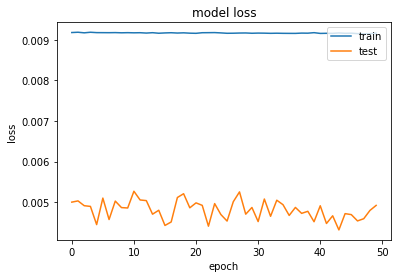

In [52]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [53]:
yhat = classifier.predict(X_test)

In [54]:
size = df2.shape[1]
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(21211,)

In [55]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(21211,)

In [56]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 32.244


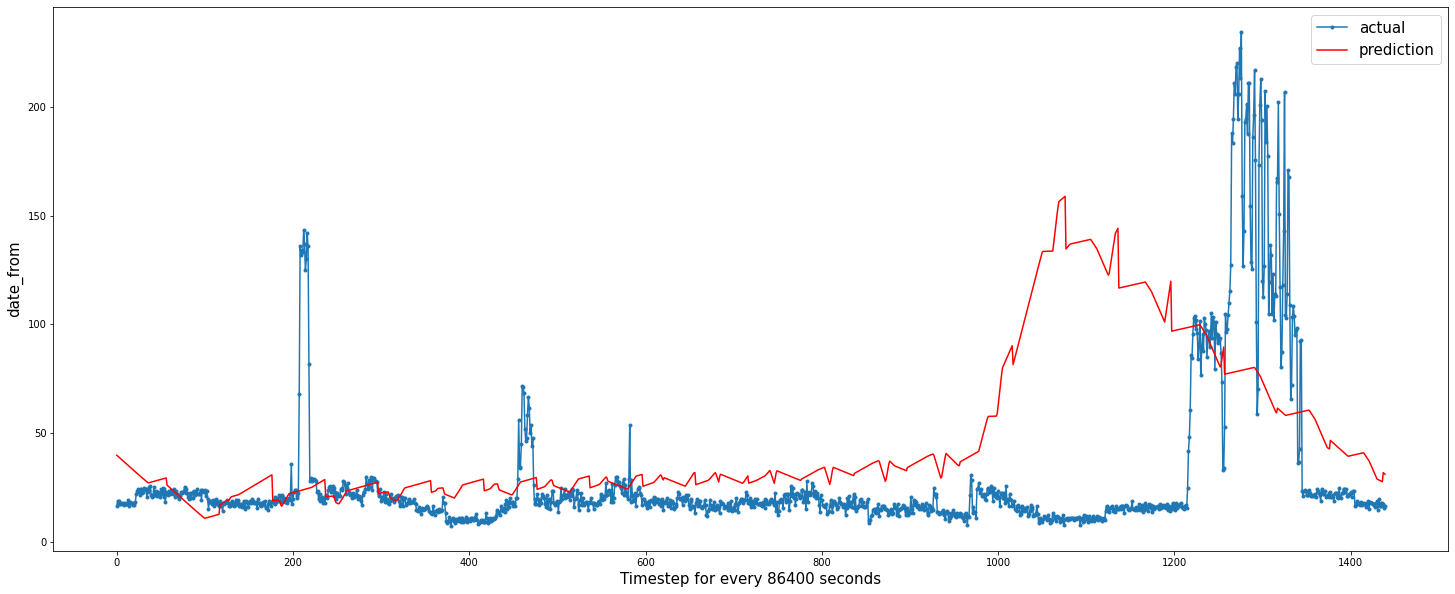

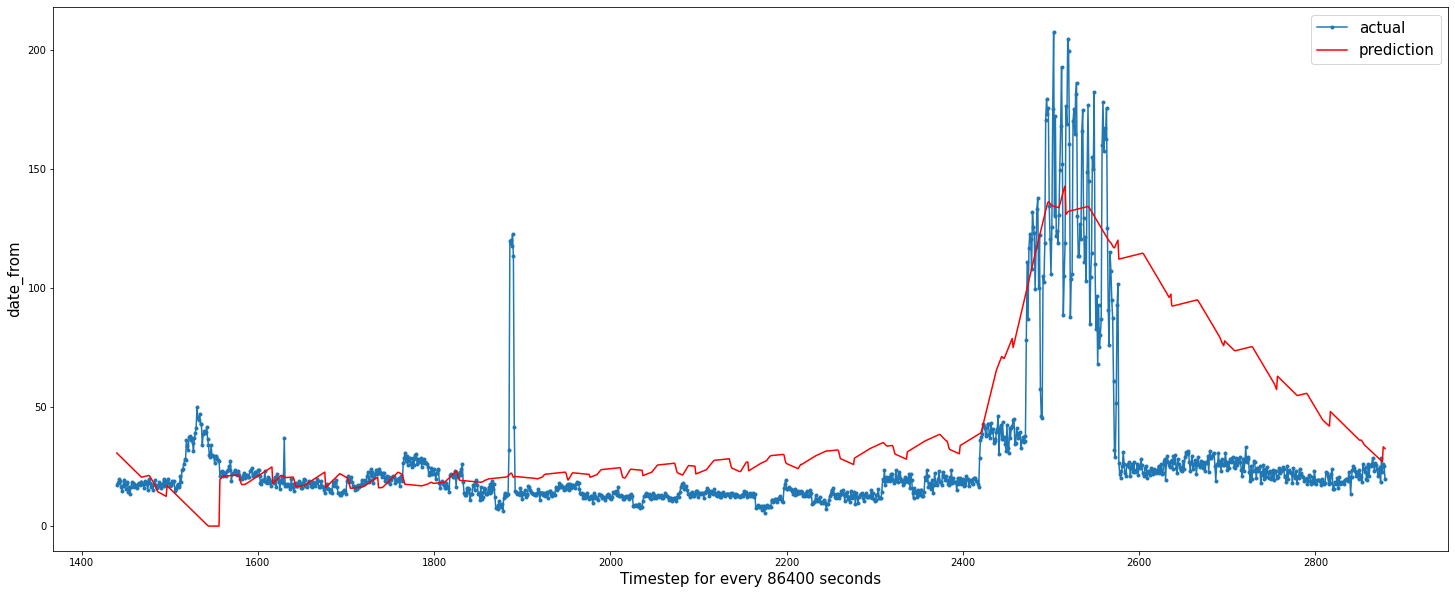

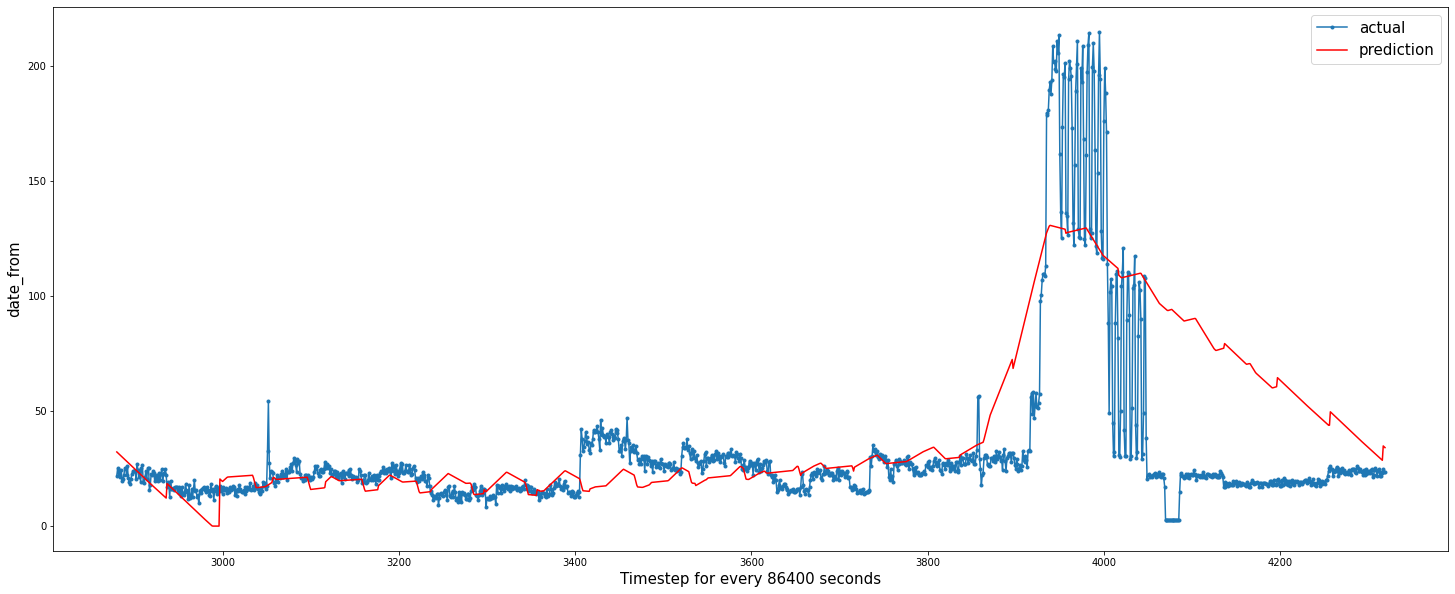

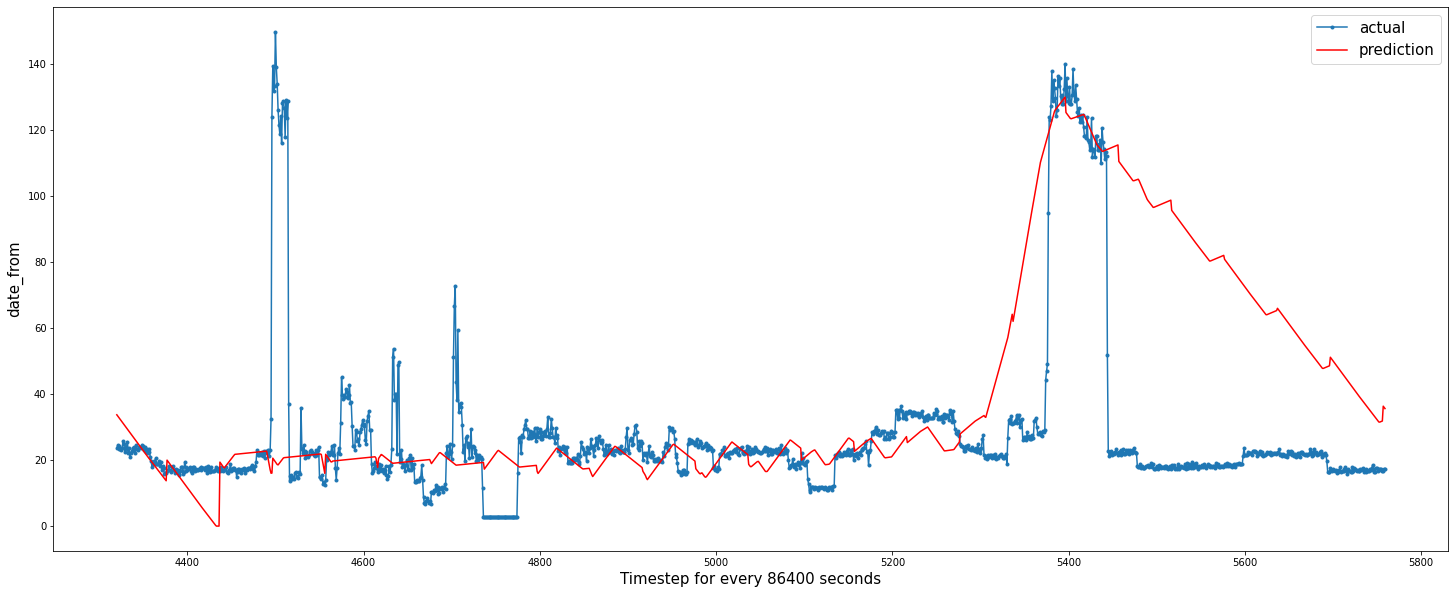

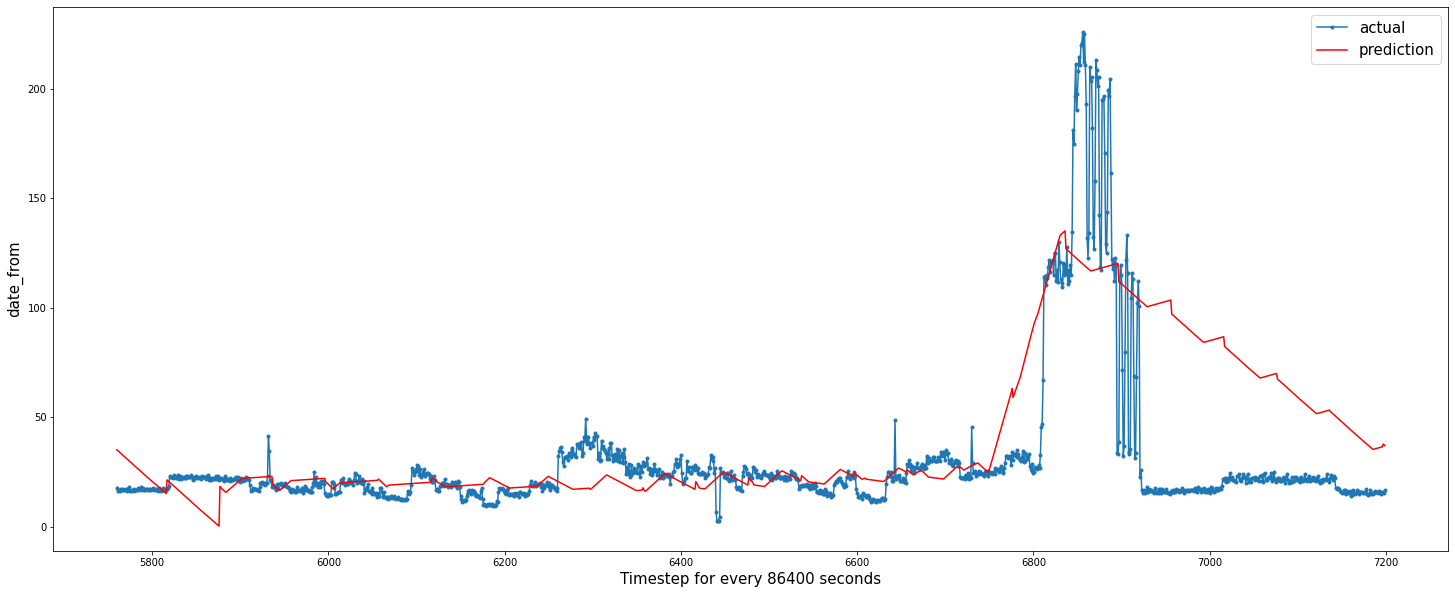

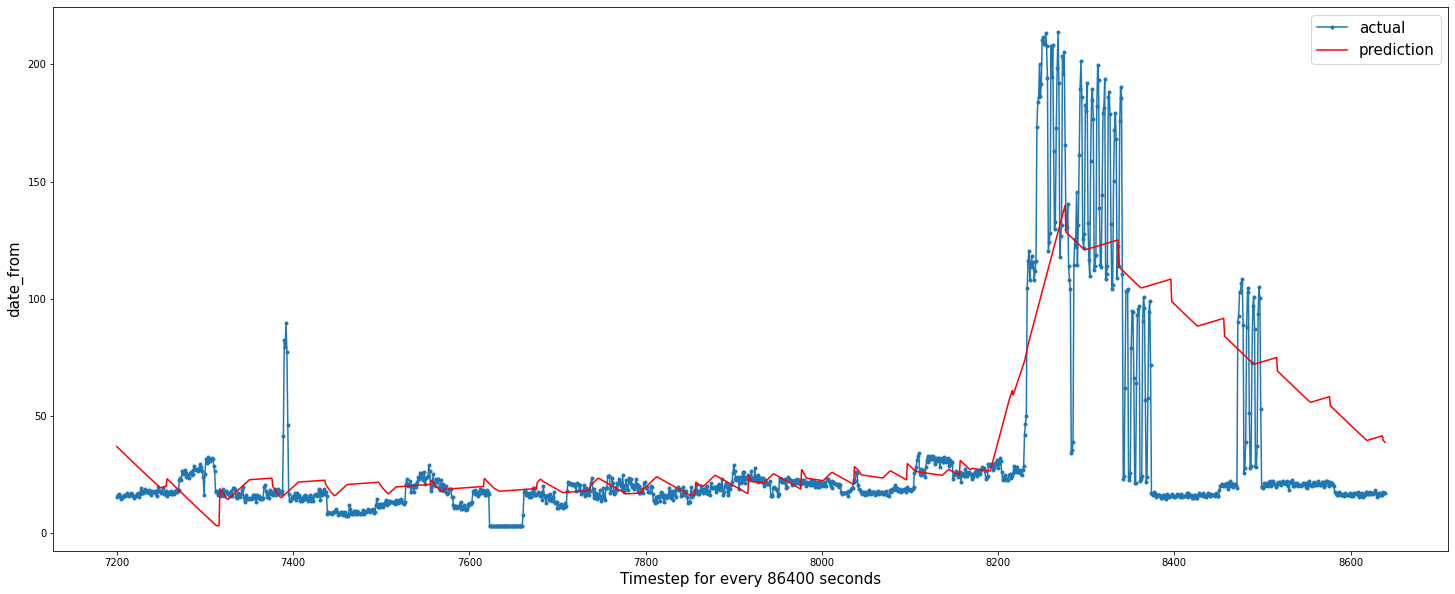

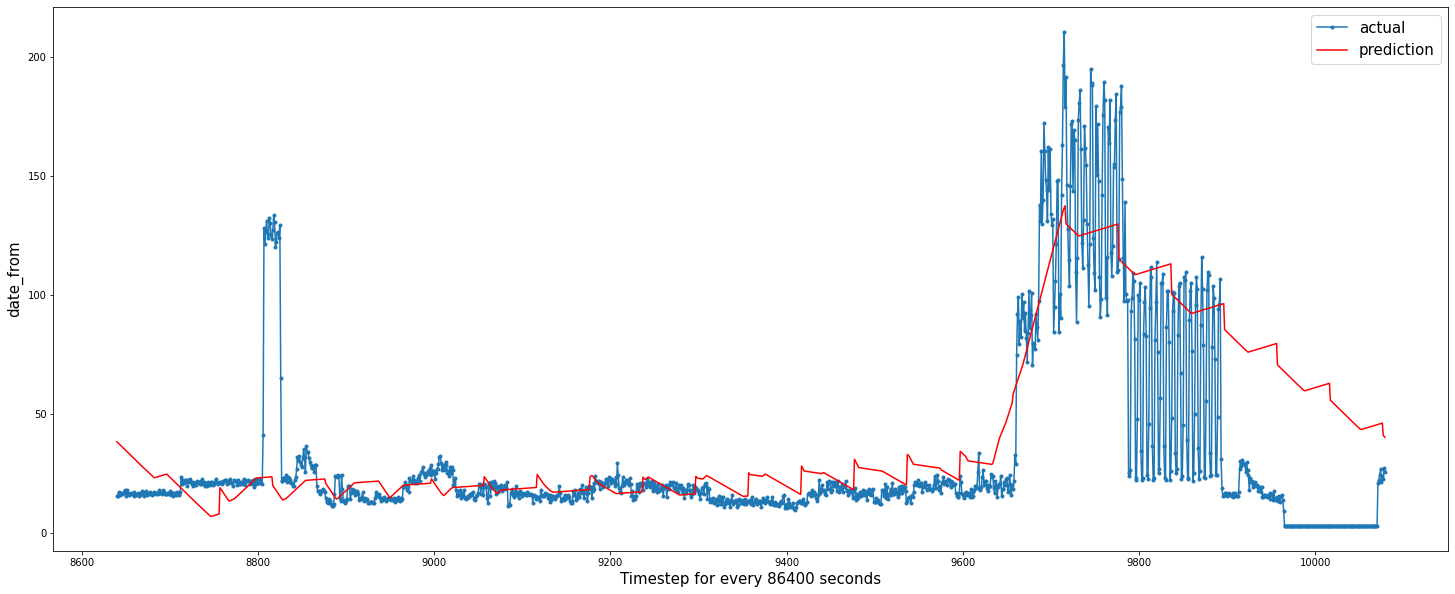

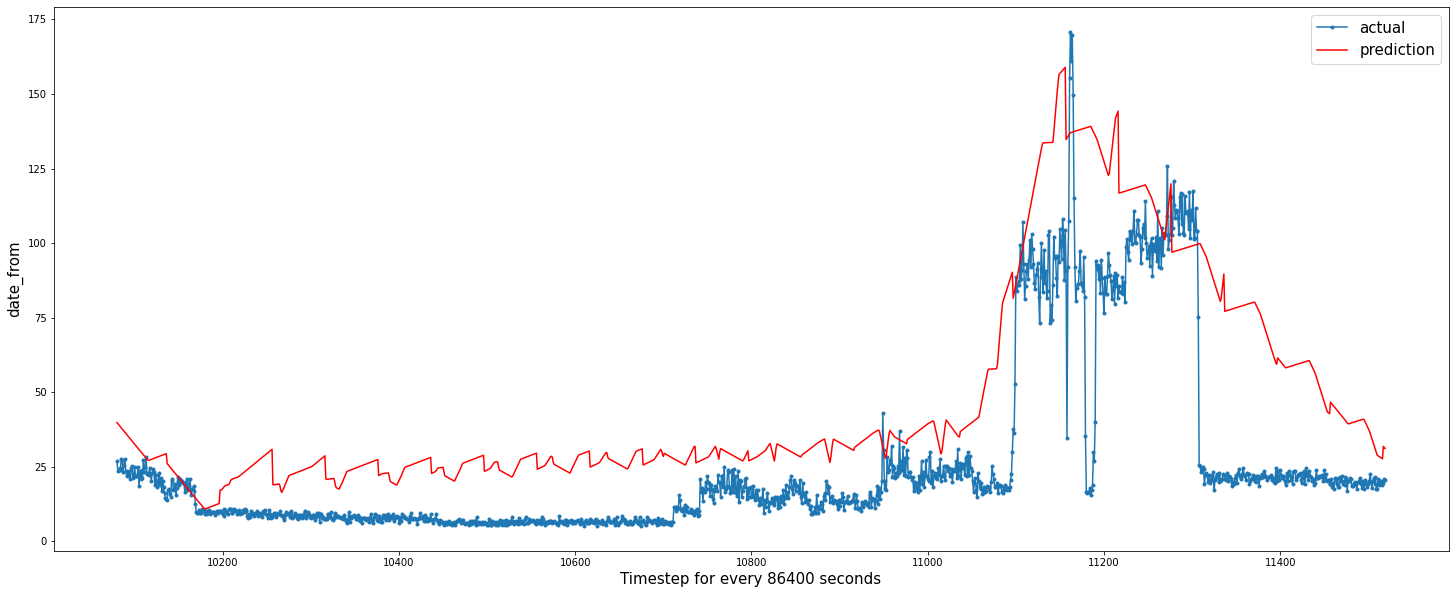

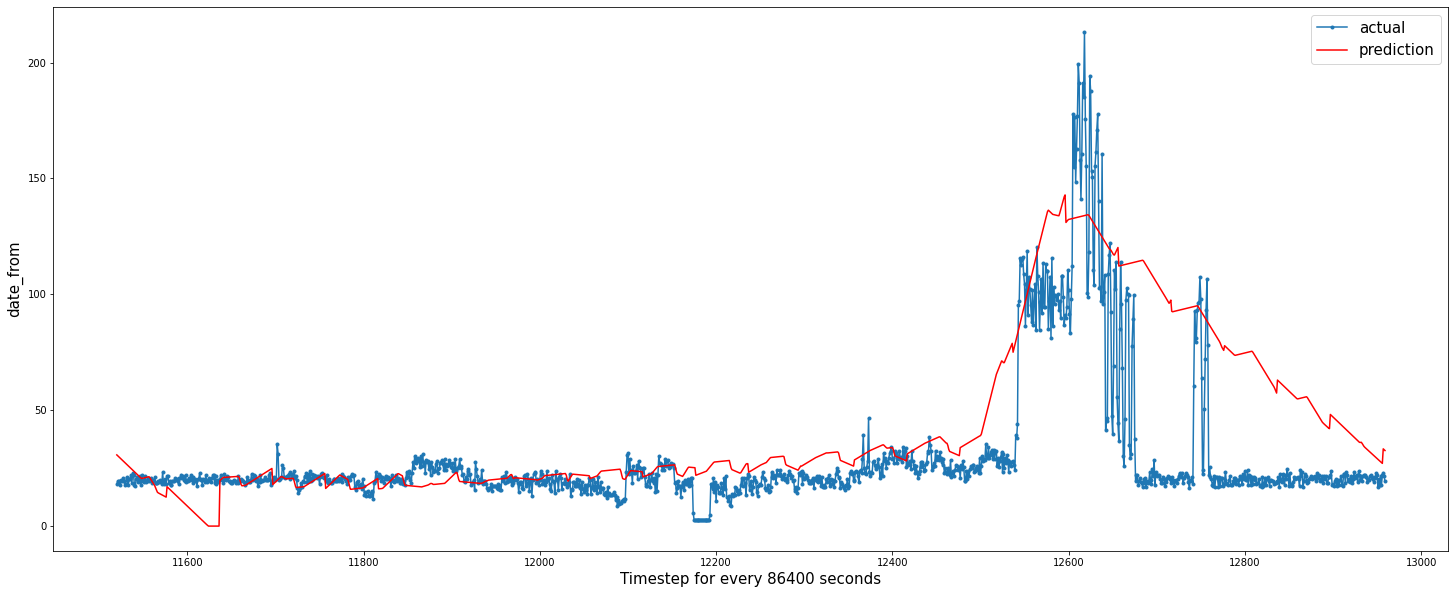

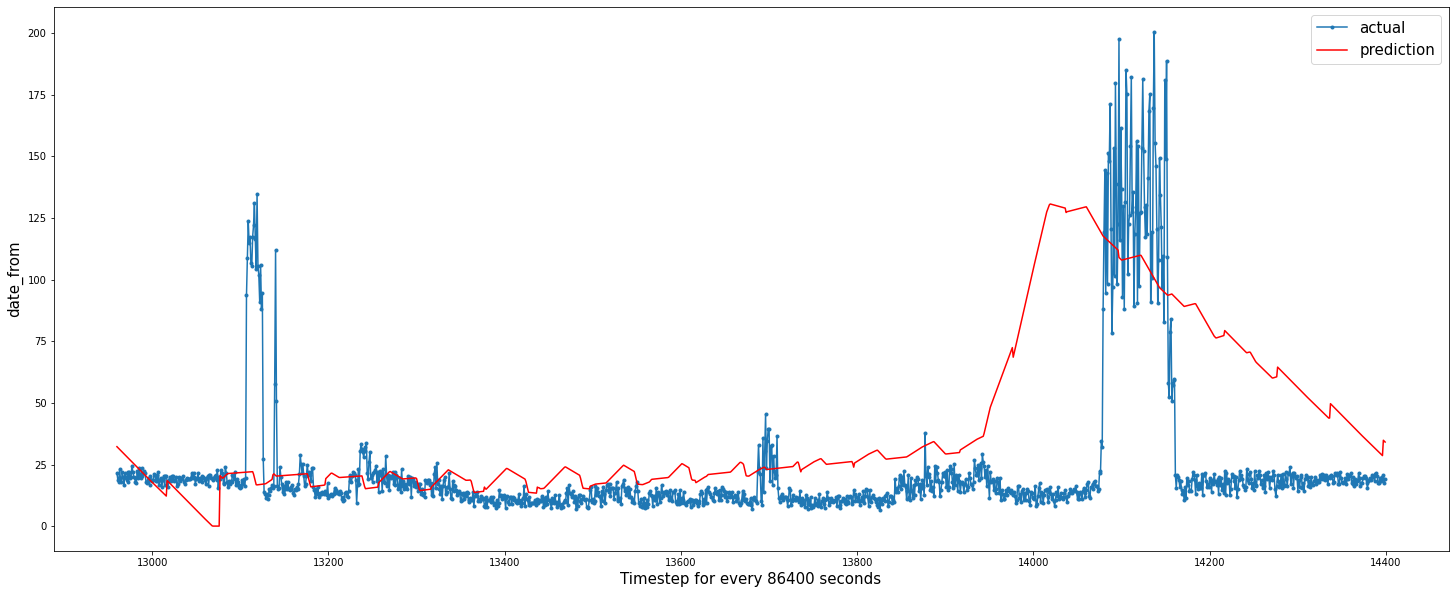

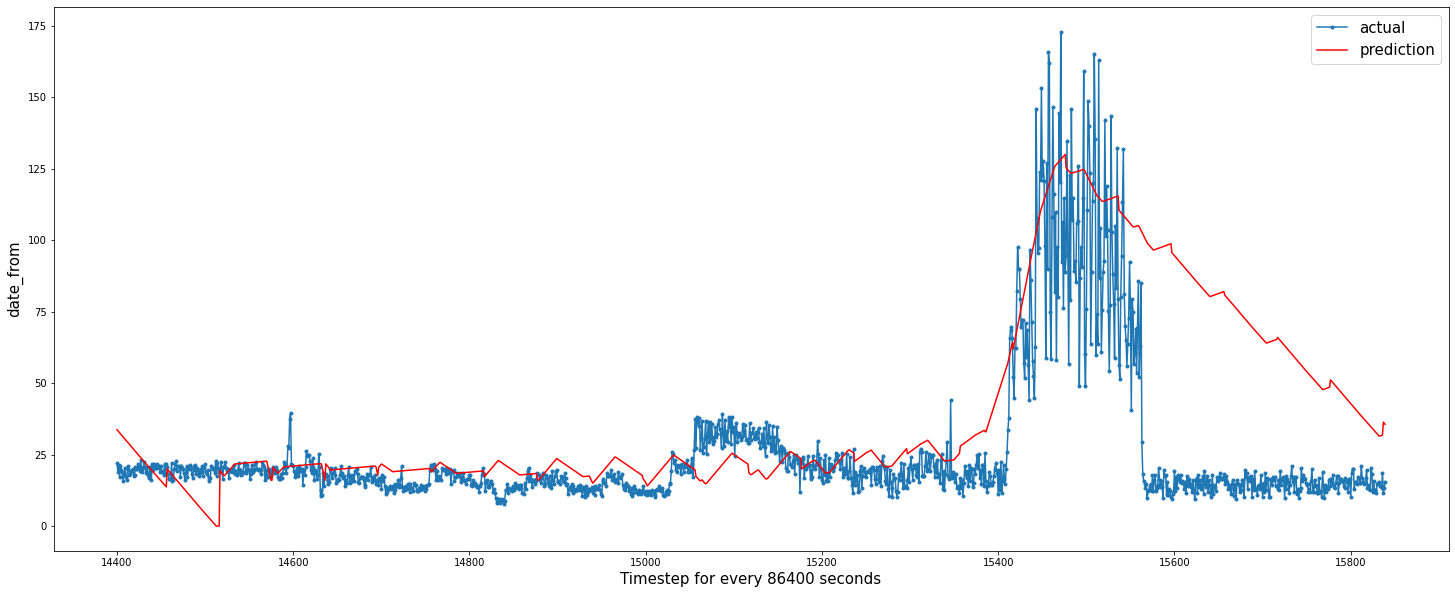

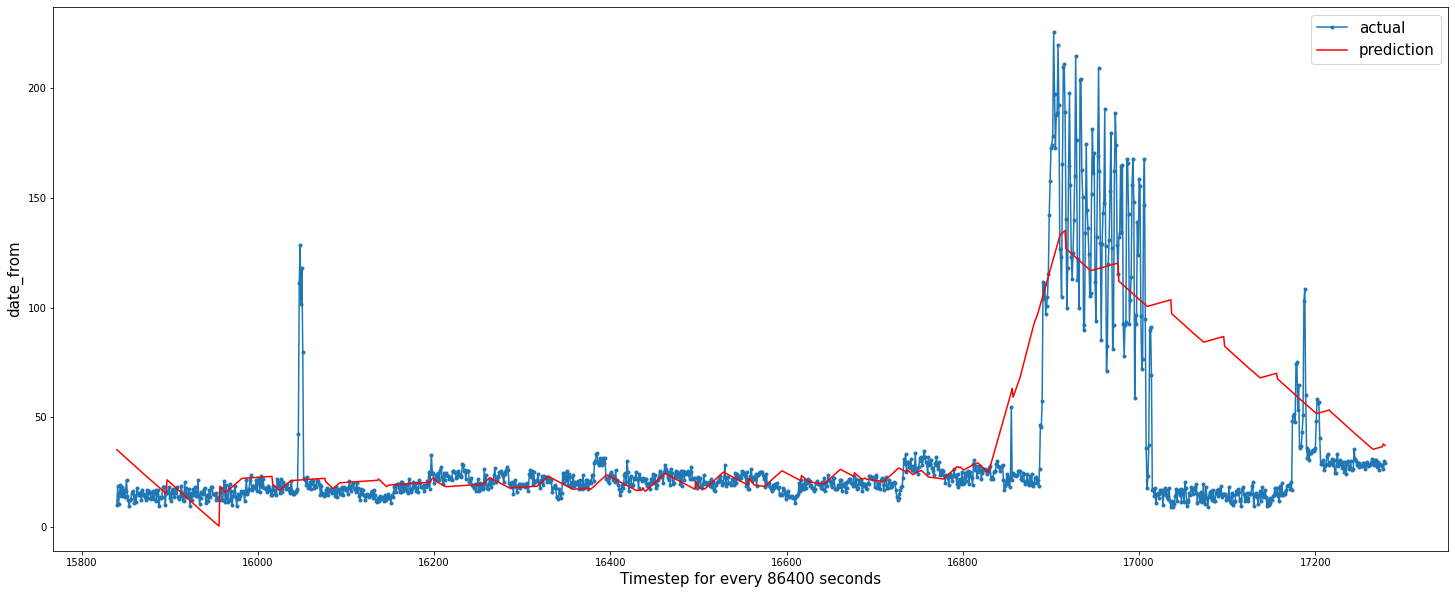

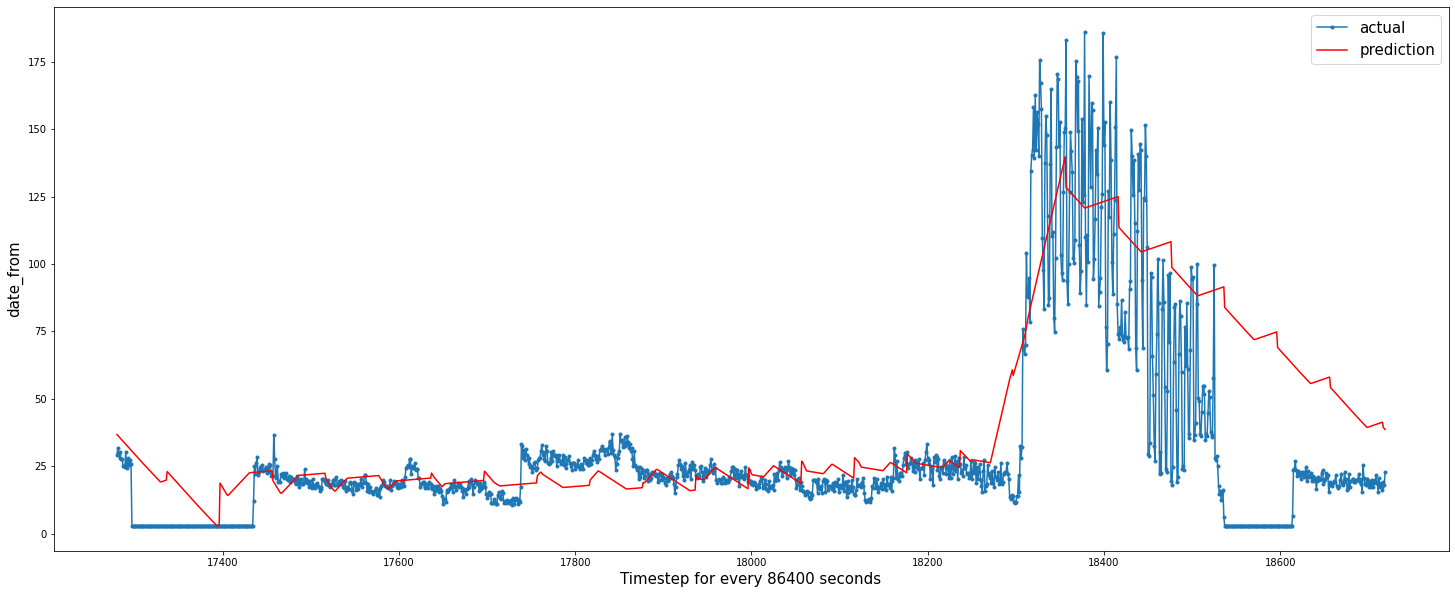

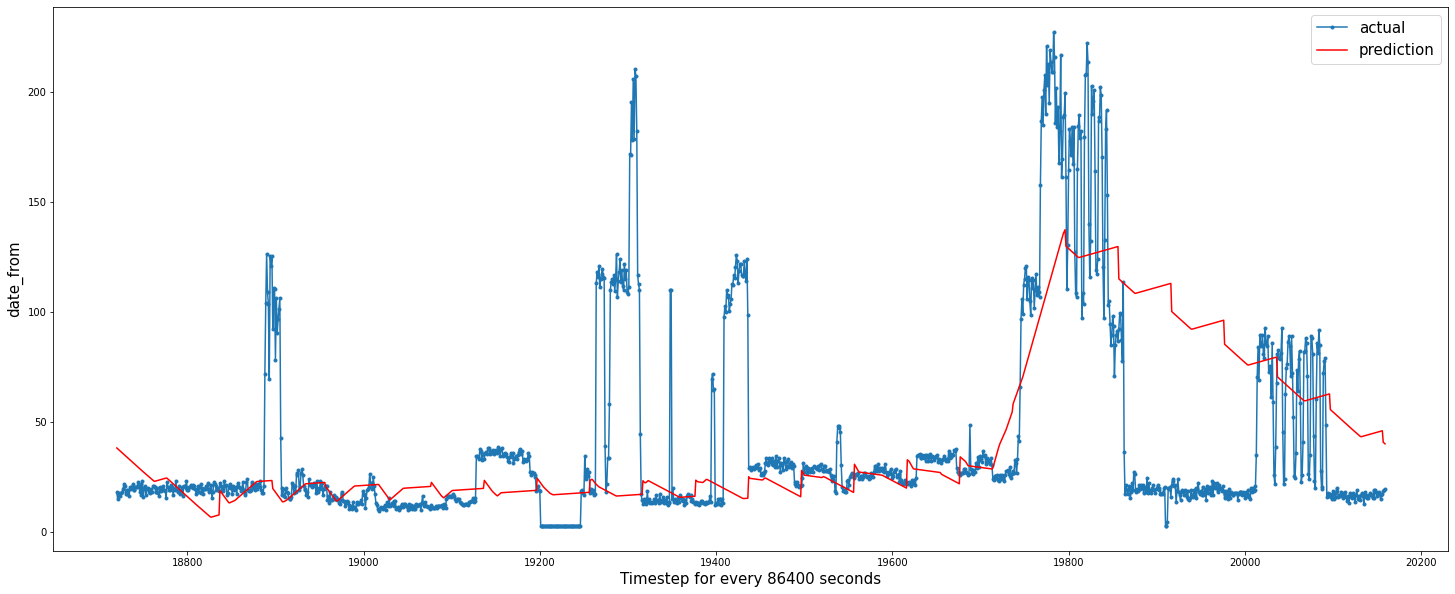

In [58]:
y=0
for i in range(1440,21211,1440):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="actual")
    plt.plot(aa, inv_yhat[y:i], 'r', label="prediction")
    y = i
    plt.ylabel(df1.columns[0], size=15)
    plt.xlabel('Timestep for every 86400 seconds', size=15)
    plt.legend(fontsize=15)
    plt.show()